In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv(r"us_counties_covid19_daily.csv")
print(data)

              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
573333  2020-09-26  Sweetwater     Wyoming  56037.0    332       2
573334  2020-09-26       Teton     Wyoming  56039.0    536       1
573335  2020-09-26       Uinta     Wyoming  56041.0    350       2
573336  2020-09-26    Washakie     Wyoming  56043.0    113       6
573337  2020-09-26      Weston     Wyoming  56045.0     36       0

[573338 rows x 6 columns]


In [3]:
print(data[(data['county'] == 'Cook') & (data['state'] == 'Illinois')])

              date county     state     fips   cases  deaths
3       2020-01-24   Cook  Illinois  17031.0       1       0
6       2020-01-25   Cook  Illinois  17031.0       1       0
11      2020-01-26   Cook  Illinois  17031.0       1       0
16      2020-01-27   Cook  Illinois  17031.0       1       0
21      2020-01-28   Cook  Illinois  17031.0       1       0
...            ...    ...       ...      ...     ...     ...
557752  2020-09-22   Cook  Illinois  17031.0  140078    5172
560988  2020-09-23   Cook  Illinois  17031.0  140623    5180
564228  2020-09-24   Cook  Illinois  17031.0  141430    5187
567468  2020-09-25   Cook  Illinois  17031.0  142215    5194
570710  2020-09-26   Cook  Illinois  17031.0  143084    5203

[247 rows x 6 columns]


In [4]:
#function thats takes input as county output date vs cases dataframe

def by_county(name, data):
    d1 = data[(data['county'] == str(name))]
    df = pd.DataFrame()
    df['date'] = d1['date']
    df['cum_cases'] = d1['cases']
    df['diff_cases'] = df['cum_cases'].diff()
    df = df.fillna(0)
    return np.array(df['cum_cases'])[-2]

In [5]:
print(by_county('Cook', data))

143084


In [6]:
cook_data = by_county('Cook', data)
plt.plot(cook_data['date'], cook_data['cum_cases'])
plt.show()

IndexError: invalid index to scalar variable.

In [7]:
data2 = pd.read_csv(r"president_county_candidate_2020.csv")
print(data2)

          state             county      candidate party  total_votes    won
0      Delaware        Kent County      Joe Biden   DEM        44552   True
1      Delaware        Kent County   Donald Trump   REP        41009  False
2      Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3      Delaware        Kent County  Howie Hawkins   GRN          420  False
4      Delaware  New Castle County      Joe Biden   DEM       195034   True
...         ...                ...            ...   ...          ...    ...
31134   Arizona    Maricopa County   Donald Trump   REP       995665  False
31135   Arizona    Maricopa County   Jo Jorgensen   LIB        31705  False
31136   Arizona      Mohave County   Donald Trump   REP        78535   True
31137   Arizona      Mohave County      Joe Biden   DEM        24831  False
31138   Arizona      Mohave County   Jo Jorgensen   LIB         1302  False

[31139 rows x 6 columns]


In [8]:
name = 'Kent'
joe_votes = int(np.array(data2[(data2['county'] == "Kent County") & (data2['candidate'] == "Joe Biden")]['total_votes'])[0])
print(joe_votes)

44552


In [9]:
def votes_county(name,data):

    joe_votes = int(np.array(data[(data['county'] == str(name) + " County") & (data['candidate'] == "Joe Biden")]['total_votes'])[0])
    t_votes = int(np.array(data[(data['county'] == str(name) + " County") & (data['candidate'] == "Donald Trump")]['total_votes'])[0])
    per = 100*t_votes/(t_votes+joe_votes)

    return per

In [10]:
print(votes_county("Kent", data2))
final = pd.DataFrame()
final['county'] = data['county'].unique()
print(final)

47.92954734049392
           county
0       Snohomish
1            Cook
2          Orange
3        Maricopa
4     Los Angeles
...           ...
1919      Wallace
1920         Loup
1921      De Baca
1922      Daggett
1923       Borden

[1924 rows x 1 columns]


In [14]:
x = np.array(final['county'])

In [29]:
ls_cum = []
ls_per = []
ls_names = []
for i in x:
    print(i)
    try:
        ls_per.append(votes_county(i, data2))
        ls_cum.append(by_county(i, data))
        ls_names.append(i)
    except:
        continue

Snohomish
Cook
Orange
Maricopa
Los Angeles
Santa Clara
Suffolk
San Francisco
Dane
San Diego
Bexar
Douglas
Humboldt
Sacramento
Solano
Spokane
Salt Lake
Marin
Napa
Sonoma
Washington
King
Alameda
Hillsborough
Manatee
New York City
Unknown
Placer
San Mateo
Fulton
Norfolk
Grafton
Walla Walla
Contra Costa
Wake
Bergen
Westchester
Fort Bend
Chelan
Jefferson
Santa Rosa
Montgomery
Middlesex
Clark
Washoe
Nassau
Williamson
Harris
Pinal
Yolo
Denver
Eagle
El Paso
Broward
Lee
Polk
Honolulu
Marion
Fayette
Ramsey
Camden
Rockland
Chatham
Tulsa
Delaware
Wayne
Charleston
Kershaw
Davis
Pierce
Fresno
Madera
Riverside
Santa Cruz
District of Columbia
Charlotte
Okaloosa
Volusia
Cobb
Gwinnett
Johnson
Berkshire
St. Louis
Rockingham
Saratoga
Jackson
Klamath
Bennington
Fairfax
Kittitas
Fairfield
Cherokee
Hendricks
Harrison
Harford
Worcester
Carver
Passaic
Ulster
Spartanburg
Davidson
Shelby
Kitsap
Pima
Shasta
Arapahoe
Larimer
DeKalb
Floyd
Noble
Pottawattamie
Prince George's
Hudson
Monmouth
Union
Cuyahoga
Monroe
Col

In [30]:
print(len(ls_cum), len(ls_per))
final3 = pd.DataFrame()
final3['counties'] = ls_names
final3['% trump 2020'] = ls_per
final3['Covid Cum'] = ls_cum

1696 1696


IndexError: list index out of range

In [31]:
print(final3)
data2016 = pd.read_csv(r"2016_data.csv")
#print(data2016)

         counties  % trump 2020  Covid Cum
0       Snohomish     39.322602       8016
1            Cook     70.412416     143084
2          Orange     38.321134         24
3        Maricopa     48.892454     140753
4     Los Angeles     27.341142     265775
...           ...           ...        ...
1691      Wallace     94.540943         17
1692         Loup     83.146067          3
1693      De Baca     73.957159          1
1694      Daggett     81.833910          1
1695       Borden     96.107056          1

[1696 rows x 3 columns]


In [38]:
df16 = pd.DataFrame()
df16['counties'] = final['county']
df16['% trump 2016'] = 100*(data2016['total_votes'] - data2016['votes_dem'])/data2016['total_votes']

In [39]:
print(df16)

         counties  % trump 2016
0       Snohomish     62.284053
1            Cook     62.284053
2          Orange     62.284053
3        Maricopa     62.284053
4     Los Angeles     62.284053
...           ...           ...
1919      Wallace     33.687346
1920         Loup     41.667610
1921      De Baca     56.392829
1922      Daggett     54.013293
1923       Borden     68.471679

[1924 rows x 2 columns]


In [40]:
all_data = pd.merge(df16, final3, on="counties")

In [41]:
print(all_data)

         counties  % trump 2016  % trump 2020  Covid Cum
0       Snohomish     62.284053     39.322602       8016
1            Cook     62.284053     70.412416     143084
2          Orange     62.284053     38.321134         24
3        Maricopa     62.284053     48.892454     140753
4     Los Angeles     62.284053     27.341142     265775
...           ...           ...           ...        ...
1691      Wallace     33.687346     94.540943         17
1692         Loup     41.667610     83.146067          3
1693      De Baca     56.392829     73.957159          1
1694      Daggett     54.013293     81.833910          1
1695       Borden     68.471679     96.107056          1

[1696 rows x 4 columns]


In [42]:
all_data["difference"] = all_data["% trump 2016"] - all_data['% trump 2020']

In [44]:
import seaborn as sns


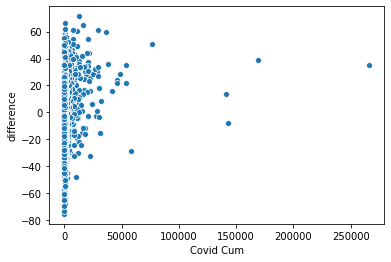

In [60]:
sns.scatterplot(data = all_data, x = "Covid Cum", y = "difference")

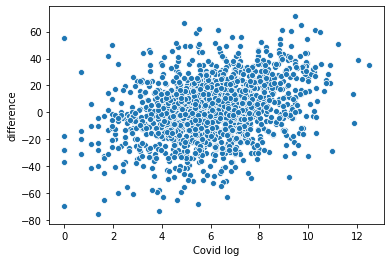

In [50]:
all_data["Covid log"] = np.log(all_data["Covid Cum"])
sns.scatterplot(data = all_data, x = "Covid log", y = "difference")

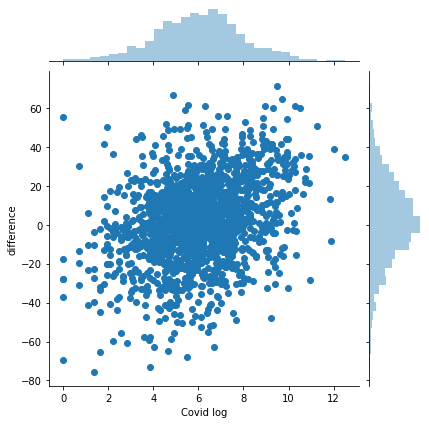

In [55]:
sns.jointplot(data = all_data, x = "Covid log", y = "difference")


In [59]:
#sns.kdeplot(data = all_data, x = "Covid log", y = "difference", levels = 10)